# Create a DataFrame with the top 100 songs and respective artists by scraping the website Billboard Hot 100. The DataFrame should have 2 columns: song_title, artist.

In [222]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import random
from difflib import get_close_matches
import seaborn as sns
import matplotlib.pyplot as plt
from decouple import config
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from difflib import get_close_matches
from IPython.display import IFrame
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import random
import time
import requests
import pickle
from sklearn.decomposition import PCA

<!DOCTYPE html>
<!--[if IE 6]>
<html id="ie6" lang="en-US">
<![endif]-->
<!--[if IE 7]>
<html id="ie7" lang="en-US">
<![endif]-->
<!--[if IE 8]>
<html id="ie8" lang="en-US">
<![endif]-->
<!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!-->
<html lang="en-US">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="#ffffff" name="theme-color"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport">
   <!-- Add to home screen for iOS -->
   <meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>
   <link href="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
   <!-- Tile icons for Windows -->
   <meta content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/browserconfig.xml" name="msapplication-config"/>
   <meta content="https://www.billboard.com/wp
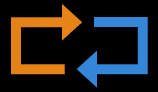

In [224]:
url = "https://www.billboard.com/charts/hot-100"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
print(soup.prettify())

## Fetch song title

In [228]:
song_title = soup.find_all("h3", class_="a-no-trucate")
songs = []
for i in song_title:
    songs.append(i.get_text(strip = True))
songs

['A Bar Song (Tipsy)',
 'Die With A Smile',
 'Birds Of A Feather',
 'Espresso',
 'Lose Control',
 "That's So True",
 'I Had Some Help',
 'Taste',
 'Beautiful Things',
 'Love Somebody',
 'Good Luck, Babe!',
 'Too Sweet',
 'APT.',
 'Timeless',
 'Please Please Please',
 'Not Like Us',
 'Sticky',
 'I Am Not Okay',
 'Lies Lies Lies',
 'Stargazing',
 'Hot To Go!',
 'Sailor Song',
 'St. Chroma',
 'Tu Boda',
 'Wildflower',
 'Whatchu Kno About Me',
 "I Love You, I'm Sorry",
 'Million Dollar Baby',
 'High Road',
 'Bed Chem',
 'The Door',
 'Miles On It',
 'Pink Skies',
 'High Road',
 'You Look Like You Love Me',
 'TGIF',
 'Cowgirls',
 'Last Christmas',
 "Ain't No Love In Oklahoma",
 "Wind Up Missin' You",
 'I Can Do It With A Broken Heart',
 'Austin',
 'Darling, I',
 'Pink Pony Club',
 'Who',
 'Like Him',
 'Help Me',
 'Rah Tah Tah',
 "This World's A Giant",
 'Kehlani',
 'Hard Fought Hallelujah',
 'Dancing In The Flames',
 'Beautiful As You',
 'Dos Dias',
 "It's Ok I'm Ok",
 'Disease',
 '25',
 'I 

## Fetch artist

In [230]:
artist =soup.find_all("span", class_="a-no-trucate")
artists = []
for i in artist:
    artists.append(i.get_text(strip = True))
artists

['Shaboozey',
 'Lady Gaga & Bruno Mars',
 'Billie Eilish',
 'Sabrina Carpenter',
 'Teddy Swims',
 'Gracie Abrams',
 'Post Malone Featuring Morgan Wallen',
 'Sabrina Carpenter',
 'Benson Boone',
 'Morgan Wallen',
 'Chappell Roan',
 'Hozier',
 'ROSE & Bruno Mars',
 'The Weeknd & Playboi Carti',
 'Sabrina Carpenter',
 'Kendrick Lamar',
 'Tyler, The Creator Featuring GloRilla, Sexyy Red & Lil Wayne',
 'Jelly Roll',
 'Morgan Wallen',
 'Myles Smith',
 'Chappell Roan',
 'Gigi Perez',
 'Tyler, The Creator Featuring Daniel Caesar',
 'Oscar Maydon & Fuerza Regida',
 'Billie Eilish',
 'GloRilla & Sexyy Red',
 'Gracie Abrams',
 'Tommy Richman',
 'Zach Bryan',
 'Sabrina Carpenter',
 'Teddy Swims',
 'Marshmello & Kane Brown',
 'Zach Bryan',
 'Koe Wetzel & Jessie Murph',
 'Ella Langley Featuring Riley Green',
 'GloRilla',
 'Morgan Wallen Featuring ERNEST',
 'Wham!',
 'Luke Combs',
 'Tucker Wetmore',
 'Taylor Swift',
 'Dasha',
 'Tyler, The Creator Featuring Teezo Touchdown',
 'Chappell Roan',
 'Jimin'

## Create Dataframe

In [232]:
billboard_df = pd.DataFrame({
        "song_title": songs,
        "artist": artists
    })
billboard_df

,song_title,artist
0,A Bar Song (Tipsy),Shaboozey
1,Die With A Smile,Lady Gaga & Bruno Mars
2,Birds Of A Feather,Billie Eilish
3,Espresso,Sabrina Carpenter
4,Lose Control,Teddy Swims
...,...,...
95,Prove It,21 Savage & Summer Walker
96,4x4xU,Lainey Wilson
97,I Ain't Sayin',Jordan Davis
98,The Largest,BigXthaPlug


# Create a Python program that takes a user input, checks if it is present in your scraped DataFrame. If it is, it recommends a random song from the DataFrame. If it’s not, it prints: Sorry, your song is not popular.

In [234]:
billboard_df = pd.DataFrame(billboard_df)


CLIENT_ID = "4109b2d9f5014671863bb2df1d1fbdd3"
CLIENT_SECRET = "5cb719fae80c4191a9c0b288f51bfe50"

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
                                                           client_secret=CLIENT_SECRET))

def play_song(song_id):
    return IFrame(src=f"https://open.spotify.com/embed/track/{song_id}", width="300", height="380")

def get_spotify_song_id(song_title):
    result = sp.search(song_title, limit=1)
    if result["tracks"]["items"]:
        return result["tracks"]["items"][0]["id"]
    return None

while True:
    user_input = input("Enter a song title: ").strip()
    matches = get_close_matches(user_input, billboard_df["song_title"].values, n=1, cutoff=0.6)

    if matches:
        closest_match = matches[0]
        print(f"Did you mean '{closest_match}'?")
        confirm = input("Type 'yes' to confirm or 'no' to retry: ").strip().lower()
        if confirm == "yes":
            song_id = get_spotify_song_id(closest_match)
            if song_id:
                display(play_song(song_id))
                print(f"Playing '{closest_match}' on Spotify!")

            recommended_row = billboard_df.sample()
            recommended_song = recommended_row["song_title"].values[0]
            recommended_artist = recommended_row["artist"].values[0]
            print(f"Great! Here's another recommended song you might like: '{recommended_song}' by artist '{recommended_artist}'")
            
            recommended_song_id = get_spotify_song_id(recommended_song)
            if recommended_song_id:
                display(play_song(recommended_song_id))
                print(f"Now playing the recommended song: '{recommended_song}' by '{recommended_artist}'")

            break
    else:
        print("Sorry, your song is not popular or the title is incorrect.")
        retry = input("Would you like to try again? Type 'yes' to retry or 'no' to exit: ").strip().lower()
        if retry != "yes":
            break


Enter a song title:  expresoo


Did you mean 'Espresso'?


Type 'yes' to confirm or 'no' to retry:  yes


Playing 'Espresso' on Spotify!
Great! Here's another recommended song you might like: 'El Lokeron' by artist 'Tito Double P'


Now playing the recommended song: 'El Lokeron' by 'Tito Double P'


# Using the Spotipy library, create a DataFrame storing the audio_features of at least 1000 songs. The more diverse your playlist, the better the end result will be!

In [236]:
CLIENT_ID = "4109b2d9f5014671863bb2df1d1fbdd3"
CLIENT_SECRET = "5cb719fae80c4191a9c0b288f51bfe50"

client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

def get_audio_features(song_ids):
    retries = 5  
    timeout = 10  
    for attempt in range(retries):
        try:
            features = sp.audio_features(song_ids)
            return features
        except requests.exceptions.RequestException as e:
            print(f"Request failed: {e}. Retrying in {2**attempt} seconds...")
            time.sleep(2**attempt)
        except spotipy.exceptions.SpotifyException as e:
            if e.http_status == 429:
                retry_after = int(e.headers.get('Retry-After', 5))  # Default to 5 seconds if not present
                print(f"Rate limit hit. Retrying in {retry_after} seconds...")
                time.sleep(retry_after)
            else:
                print(f"Error occurred: {e}")
                break
        except Exception as e:
            print(f"Unexpected error: {e}")
            break
    return []

track_data = []
genres = ['Pop', 'Rock', 'Hip-Hop', 'Classical', 'Jazz', 'Electronic', 'Indie', 'Metal', 'Blues']

for genre in genres:
    offset = 0
    while offset < 200:
        results = sp.search(q=f'genre:{genre}', type='track', limit=50, offset=offset)
        for item in results['tracks']['items']:
            track_data.append({
                'id': item['id'],
                'name': item['name'],
                'url': item['external_urls']['spotify'],
                'genres': genre
            })
        offset += 50

random.shuffle(track_data)

track_data = track_data[:1000]
batch_size = 50 
audio_features = []

for i in range(0, len(track_data), batch_size):
    batch_ids = [track['id'] for track in track_data[i:i+batch_size]]
    features = get_audio_features(batch_ids)
    if features:
        for idx, feature in enumerate(features):
            track_data[i+idx].update(feature)

audio_features_df = pd.DataFrame(track_data)
print(audio_features_df.head())


                       id                                               name  \
0  1ZC21hJb2GASRkaoZvUcCS                                        Beving: Ala   
1  30vg2QguPyaa7PcAJTn9YE                                     sonnenbank.mp3   
2  17lu3VOOdnuf6fvtj6TDL5                              Vielleicht Vielleicht   
3  3DNRdudZ2SstnDCVKFdXxG  Sonata No. 14 "Moonlight" in C-Sharp Minor", O...   
4  0vZCG0H9KhtU7K8MEUVAoV                                            Tsunami   

                                                 url      genres  \
0  https://open.spotify.com/track/1ZC21hJb2GASRka...   Classical   
1  https://open.spotify.com/track/30vg2QguPyaa7Pc...     Hip-Hop   
2  https://open.spotify.com/track/17lu3VOOdnuf6fv...       Indie   
3  https://open.spotify.com/track/3DNRdudZ2SstnDC...   Classical   
4  https://open.spotify.com/track/0vZCG0H9KhtU7K8...  Electronic   

   danceability   energy  key  loudness  mode  speechiness  ...  \
0         0.324  0.11600    7   -22.841    

In [238]:
audio_features_df.to_csv('/Users/rishikeshdhokare/Documents/Ironhack/MiniProject/spotify_recommender/audio_features_df.csv', index=False)

In [240]:
audio_features_df

,id,name,url,genres,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,1ZC21hJb2GASRkaoZvUcCS,Beving: Ala,https://open.spotify.com/track/1ZC21hJb2GASRka...,Classical,0.324,0.11600,7,-22.841,0,0.0348,...,0.926000,0.1130,0.299,79.487,audio_features,spotify:track:1ZC21hJb2GASRkaoZvUcCS,https://api.spotify.com/v1/tracks/1ZC21hJb2GAS...,https://api.spotify.com/v1/audio-analysis/1ZC2...,120853,1
1,30vg2QguPyaa7PcAJTn9YE,sonnenbank.mp3,https://open.spotify.com/track/30vg2QguPyaa7Pc...,Hip-Hop,0.794,0.66800,8,-6.175,1,0.1980,...,0.000000,0.1530,0.653,114.020,audio_features,spotify:track:30vg2QguPyaa7PcAJTn9YE,https://api.spotify.com/v1/tracks/30vg2QguPyaa...,https://api.spotify.com/v1/audio-analysis/30vg...,121649,4
2,17lu3VOOdnuf6fvtj6TDL5,Vielleicht Vielleicht,https://open.spotify.com/track/17lu3VOOdnuf6fv...,Indie,0.563,0.56800,5,-6.737,1,0.0477,...,0.000000,0.1570,0.689,178.057,audio_features,spotify:track:17lu3VOOdnuf6fvtj6TDL5,https://api.spotify.com/v1/tracks/17lu3VOOdnuf...,https://api.spotify.com/v1/audio-analysis/17lu...,207752,4
3,3DNRdudZ2SstnDCVKFdXxG,"Sonata No. 14 ""Moonlight"" in C-Sharp Minor"", O...",https://open.spotify.com/track/3DNRdudZ2SstnDC...,Classical,0.184,0.00527,1,-37.264,0,0.0432,...,0.887000,0.1730,0.151,170.612,audio_features,spotify:track:3DNRdudZ2SstnDCVKFdXxG,https://api.spotify.com/v1/tracks/3DNRdudZ2Sst...,https://api.spotify.com/v1/audio-analysis/3DNR...,315427,3
4,0vZCG0H9KhtU7K8MEUVAoV,Tsunami,https://open.spotify.com/track/0vZCG0H9KhtU7K8...,Electronic,0.699,0.83900,4,-5.353,0,0.0481,...,0.655000,0.0897,0.264,128.026,audio_features,spotify:track:0vZCG0H9KhtU7K8MEUVAoV,https://api.spotify.com/v1/tracks/0vZCG0H9KhtU...,https://api.spotify.com/v1/audio-analysis/0vZC...,236706,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0lTMhXQy3qYlmAO3uf6zQa,"O ewiges Feuer, o Ursprung der Liebe, BWV 34: ...",https://open.spotify.com/track/0lTMhXQy3qYlmAO...,Classical,0.278,0.23100,8,-16.586,1,0.0353,...,0.438000,0.0927,0.141,102.863,audio_features,spotify:track:0lTMhXQy3qYlmAO3uf6zQa,https://api.spotify.com/v1/tracks/0lTMhXQy3qYl...,https://api.spotify.com/v1/audio-analysis/0lTM...,357320,4
996,0yljUudXzjVcGEoYmLB17X,Genesis,https://open.spotify.com/track/0yljUudXzjVcGEo...,Indie,0.611,0.67700,10,-6.745,0,0.0340,...,0.069800,0.2410,0.233,166.040,audio_features,spotify:track:0yljUudXzjVcGEoYmLB17X,https://api.spotify.com/v1/tracks/0yljUudXzjVc...,https://api.spotify.com/v1/audio-analysis/0ylj...,255320,4
997,4LcrHUkRmXG3c0YD5VYutn,At The Hop,https://open.spotify.com/track/4LcrHUkRmXG3c0Y...,Blues,0.407,0.82600,8,-8.290,1,0.0495,...,0.000016,0.2850,0.891,192.210,audio_features,spotify:track:4LcrHUkRmXG3c0YD5VYutn,https://api.spotify.com/v1/tracks/4LcrHUkRmXG3...,https://api.spotify.com/v1/audio-analysis/4Lcr...,150867,4
998,7uoFMmxln0GPXQ0AcCBXRq,Snowman,https://open.spotify.com/track/7uoFMmxln0GPXQ0...,Pop,0.717,0.52400,1,-6.222,1,0.0331,...,0.000000,0.0932,0.339,104.953,audio_features,spotify:track:7uoFMmxln0GPXQ0AcCBXRq,https://api.spotify.com/v1/tracks/7uoFMmxln0GP...,https://api.spotify.com/v1/audio-analysis/7uoF...,165900,3


In [242]:
audio_features_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.577896,0.606157,5.488000,-9.189531,0.562000,0.076064,0.326201,0.157702,0.179873,0.504868,120.034128,207349.455000,3.903000
std,0.171506,0.259293,3.487121,6.334247,0.496389,0.075701,0.356784,0.313930,0.140728,0.251868,30.208049,66725.208514,0.433334
min,0.000000,0.002510,0.000000,-41.696000,0.000000,0.000000,0.000006,0.000000,0.027100,0.000000,0.000000,52187.000000,0.000000
25%,0.463000,0.435750,2.000000,-10.508500,0.000000,0.035400,0.019925,0.000000,0.096775,0.310500,96.866750,166046.500000,4.000000
50%,0.582500,0.661000,6.000000,-7.123500,1.000000,0.046150,0.153000,0.000154,0.121000,0.510000,119.986500,203653.500000,4.000000
75%,0.706000,0.816000,8.250000,-5.258500,1.000000,0.080350,0.643250,0.055500,0.213250,0.690000,139.514750,240339.750000,4.000000
max,0.966000,0.996000,11.000000,-1.574000,1.000000,0.857000,0.996000,0.969000,0.976000,0.992000,204.113000,622000.000000,5.000000


In [244]:
audio_df = audio_features_df

In [246]:
audio_df.columns

Index(['id', 'name', 'url', 'genres', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'uri', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')

In [248]:
audio_features_df= audio_df.select_dtypes("number")
audio_features_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.324,0.11600,7,-22.841,0,0.0348,0.9860,0.926000,0.1130,0.299,79.487,120853,1
1,0.794,0.66800,8,-6.175,1,0.1980,0.1650,0.000000,0.1530,0.653,114.020,121649,4
2,0.563,0.56800,5,-6.737,1,0.0477,0.2780,0.000000,0.1570,0.689,178.057,207752,4
3,0.184,0.00527,1,-37.264,0,0.0432,0.9950,0.887000,0.1730,0.151,170.612,315427,3
4,0.699,0.83900,4,-5.353,0,0.0481,0.0483,0.655000,0.0897,0.264,128.026,236706,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.278,0.23100,8,-16.586,1,0.0353,0.9700,0.438000,0.0927,0.141,102.863,357320,4
996,0.611,0.67700,10,-6.745,0,0.0340,0.0764,0.069800,0.2410,0.233,166.040,255320,4
997,0.407,0.82600,8,-8.290,1,0.0495,0.6930,0.000016,0.2850,0.891,192.210,150867,4
998,0.717,0.52400,1,-6.222,1,0.0331,0.4260,0.000000,0.0932,0.339,104.953,165900,3


# Scale audio features df with save scaler

In [250]:
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def save_model(model, filename):
    with open(filename, "wb") as f:
        pickle.dump(model, f)
    print(f"Model saved to {filename}")

def load_model(filename):

    try:
        with open(filename, 'rb') as f:
            return pickle.load(f)
    except FileNotFoundError:
        print(f"File '{filename}' not found!")
        return None

columns_to_scale = ['danceability', 'energy', 'key', 'loudness', 'mode', 
                    'speechiness', 'acousticness', 'instrumentalness', 
                    'liveness', 'valence', 'tempo', 'duration_ms', 
                    'time_signature']

scaler = StandardScaler()
scaler.fit(audio_features_df[columns_to_scale])

# Save the scaler
save_model(scaler, "scaler1.pickle")


Model saved to scaler1.pickle


In [252]:
# Load the scaler
loaded_scaler = load_model("scaler1.pickle")

# Verify the loaded scaler
if loaded_scaler:
    audio_features_scaled = loaded_scaler.transform(audio_features_df[columns_to_scale])
    print("Data scaled successfully!")

Data scaled successfully!


# Model Predict (audio features)

In [254]:
kmeans = KMeans(n_clusters=16, random_state=42)
kmeans.fit(audio_features_scaled)

save_model(kmeans, "kmeans_model.pickle")
loaded_kmeans = load_model("kmeans_model.pickle")

if loaded_kmeans:
    audio_features_df['KMeans_Cluster'] = loaded_kmeans.predict(audio_features_scaled)
    print("Clusters assigned successfully!")


Model saved to kmeans_model.pickle
Clusters assigned successfully!


In [256]:
audio_features_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,KMeans_Cluster
0,0.324,0.11600,7,-22.841,0,0.0348,0.9860,0.926000,0.1130,0.299,79.487,120853,1,15
1,0.794,0.66800,8,-6.175,1,0.1980,0.1650,0.000000,0.1530,0.653,114.020,121649,4,8
2,0.563,0.56800,5,-6.737,1,0.0477,0.2780,0.000000,0.1570,0.689,178.057,207752,4,4
3,0.184,0.00527,1,-37.264,0,0.0432,0.9950,0.887000,0.1730,0.151,170.612,315427,3,6
4,0.699,0.83900,4,-5.353,0,0.0481,0.0483,0.655000,0.0897,0.264,128.026,236706,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.278,0.23100,8,-16.586,1,0.0353,0.9700,0.438000,0.0927,0.141,102.863,357320,4,6
996,0.611,0.67700,10,-6.745,0,0.0340,0.0764,0.069800,0.2410,0.233,166.040,255320,4,1
997,0.407,0.82600,8,-8.290,1,0.0495,0.6930,0.000016,0.2850,0.891,192.210,150867,4,4
998,0.717,0.52400,1,-6.222,1,0.0331,0.4260,0.000000,0.0932,0.339,104.953,165900,3,7


In [258]:
# 8. Get cluster

n_clusters = kmeans.n_clusters
print(f"Number of clusters: {n_clusters}")

Number of clusters: 16


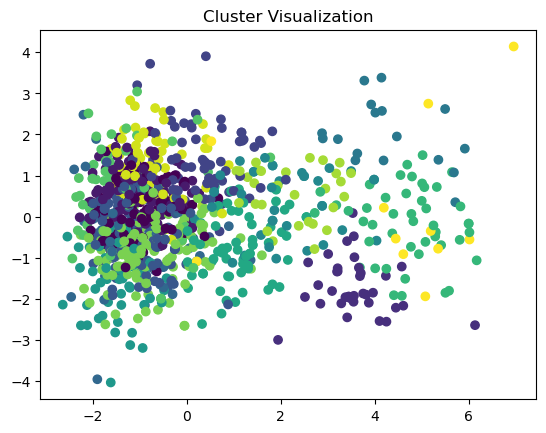

In [260]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(audio_features_scaled)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=audio_features_df['KMeans_Cluster'], cmap='viridis')
plt.title('Cluster Visualization')
plt.show()

In [262]:
audio_features_df['KMeans_Cluster'] = kmeans.predict(audio_features_scaled)

In [264]:
print(audio_features_df['KMeans_Cluster'].unique())

[15  8  4  6  1  3 12  0  5  9  7  2 13 14 10 11]


In [266]:
print(audio_features_df[['KMeans_Cluster']].head())

   KMeans_Cluster
0              15
1               8
2               4
3               6
4               1


In [268]:
print(audio_features_df['KMeans_Cluster'].value_counts())

KMeans_Cluster
12    136
1     133
4     119
0     103
14     70
9      66
3      63
8      52
11     47
10     46
7      38
2      36
13     32
5      31
6      17
15     11
Name: count, dtype: int64


In [270]:
print(kmeans.n_clusters)

16


In [272]:
audio_features_df = audio_features_df.merge(audio_df[['name', 'uri', 'genres']], left_index=True, right_index=True)

In [274]:
audio_features_df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'KMeans_Cluster', 'name', 'uri',
       'genres'],
      dtype='object')

In [276]:
audio_features_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,KMeans_Cluster,name,uri,genres
0,0.324,0.11600,7,-22.841,0,0.0348,0.9860,0.926000,0.1130,0.299,79.487,120853,1,15,Beving: Ala,spotify:track:1ZC21hJb2GASRkaoZvUcCS,Classical
1,0.794,0.66800,8,-6.175,1,0.1980,0.1650,0.000000,0.1530,0.653,114.020,121649,4,8,sonnenbank.mp3,spotify:track:30vg2QguPyaa7PcAJTn9YE,Hip-Hop
2,0.563,0.56800,5,-6.737,1,0.0477,0.2780,0.000000,0.1570,0.689,178.057,207752,4,4,Vielleicht Vielleicht,spotify:track:17lu3VOOdnuf6fvtj6TDL5,Indie
3,0.184,0.00527,1,-37.264,0,0.0432,0.9950,0.887000,0.1730,0.151,170.612,315427,3,6,"Sonata No. 14 ""Moonlight"" in C-Sharp Minor"", O...",spotify:track:3DNRdudZ2SstnDCVKFdXxG,Classical
4,0.699,0.83900,4,-5.353,0,0.0481,0.0483,0.655000,0.0897,0.264,128.026,236706,4,1,Tsunami,spotify:track:0vZCG0H9KhtU7K8MEUVAoV,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.278,0.23100,8,-16.586,1,0.0353,0.9700,0.438000,0.0927,0.141,102.863,357320,4,6,"O ewiges Feuer, o Ursprung der Liebe, BWV 34: ...",spotify:track:0lTMhXQy3qYlmAO3uf6zQa,Classical
996,0.611,0.67700,10,-6.745,0,0.0340,0.0764,0.069800,0.2410,0.233,166.040,255320,4,1,Genesis,spotify:track:0yljUudXzjVcGEoYmLB17X,Indie
997,0.407,0.82600,8,-8.290,1,0.0495,0.6930,0.000016,0.2850,0.891,192.210,150867,4,4,At The Hop,spotify:track:4LcrHUkRmXG3c0YD5VYutn,Blues
998,0.717,0.52400,1,-6.222,1,0.0331,0.4260,0.000000,0.0932,0.339,104.953,165900,3,7,Snowman,spotify:track:7uoFMmxln0GPXQ0AcCBXRq,Pop


# Recommend song from audio_features_df

In [278]:
def simple_rec():
    user_input = input("Please enter a song: ")
    user_json = sp.search(user_input, limit=1)
    
    if len(user_json["tracks"]["items"]) == 0:
        print("Song not found on Spotify.")
        return
    
    user_id = user_json["tracks"]["items"][0]["id"]
    display(play_song(user_id))

    if user_input in audio_features_df['name'].values:
        rec_pop_song = audio_features_df.sample(1)
        rec_song_name = rec_pop_song['name'].values[0]
        rec_json = sp.search(rec_song_name, limit=1)
        rec_id = rec_json["tracks"]["items"][0]["id"]
        display(play_song(rec_id))
        print(f"Recommended song from Cluster: '{rec_song_name}'")
    else:
        with open("scaler1.pickle", "rb") as file:
            scaler = pickle.load(file)
        
        print("Sorry, not hot.")


In [185]:
simple_rec()

Please enter a song:  Basket Case


Recommended song from Cluster 15: 'Christ lag in Todes Banden, BWV 4: V. Versus No. 4, Es war ein wunderlicher Krieg'


# Song Recommender

In [284]:
billboard_df = pd.DataFrame(billboard_df)

CLIENT_ID = "4109b2d9f5014671863bb2df1d1fbdd3"
CLIENT_SECRET = "5cb719fae80c4191a9c0b288f51bfe50"

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=CLIENT_ID,
                                                           client_secret=CLIENT_SECRET))

def play_song(song_id):
    return IFrame(src=f"https://open.spotify.com/embed/track/{song_id}", width="300", height="380")

def get_spotify_song_id(song_title):
    result = sp.search(song_title, limit=1)
    if result["tracks"]["items"]:
        return result["tracks"]["items"][0]["id"]
    return None

def simple_rec():
    user_input = input("Please enter a song: ").strip()
    user_json = sp.search(user_input, limit=1)
    
    if len(user_json["tracks"]["items"]) == 0:
        print("Song not found on Spotify.")
        return
    
    user_id = user_json["tracks"]["items"][0]["id"]
    display(play_song(user_id))
    
    if user_input in audio_features_df['name'].values:
        rec_pop_song = audio_features_df.sample(1)
        rec_song_name = rec_pop_song['name'].values[0]
        rec_json = sp.search(rec_song_name, limit=1)
        rec_id = rec_json["tracks"]["items"][0]["id"]
        display(play_song(rec_id))
        print(f"Recommended song from Cluster: '{rec_song_name}'")
    else:
        with open("scaler1.pickle", "rb") as file:
            scaler = pickle.load(file)
        
        print("Sorry, not hot.")

while True:
    user_input = input("Enter a song title: ").strip()
    matches = get_close_matches(user_input, billboard_df["song_title"].values, n=1, cutoff=0.6)

    if matches:
        closest_match = matches[0]
        print(f"Did you mean '{closest_match}'?")
        confirm = input("Type 'yes' to confirm or 'no' to retry: ").strip().lower()
        if confirm == "yes":
            song_id = get_spotify_song_id(closest_match)
            if song_id:
                display(play_song(song_id))
                print(f"Playing '{closest_match}' on Spotify!")

            recommended_row = billboard_df.sample()
            recommended_song = recommended_row["song_title"].values[0]
            recommended_artist = recommended_row["artist"].values[0]
            print(f"Great it is Hot Song! Here's another recommended song you might like: '{recommended_song}' by artist '{recommended_artist}'")
            
            recommended_song_id = get_spotify_song_id(recommended_song)
            if recommended_song_id:
                display(play_song(recommended_song_id))
                print(f"Now playing the recommended song: '{recommended_song}' by '{recommended_artist}'")
            break
        elif confirm == "no":
            simple_rec()
            break
    else:
        print("Sorry, your song is not hot or the title is incorrect.")
        retry = input("Would you like to try again? Type 'yes' to retry or 'no' to exit: ").strip().lower()
        if retry != "yes":
            break


Enter a song title:  expresoo


Did you mean 'Espresso'?


Type 'yes' to confirm or 'no' to retry:  no
Please enter a song:  Tsunami


Recommended song from Cluster: 'I Want It That Way'
